In [32]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [33]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [34]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Create an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results
 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [35]:
network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu')) 
network.add(layers.Dense(1, activation='sigmoid')) 

/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [37]:
x_test, x_val = x_test[:15000,], x_test[15000:,]
y_test, y_val = y_test[:15000,], y_test[15000:,]

In [38]:
history = network.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7382 - loss: 0.5541 - val_accuracy: 0.8827 - val_loss: 0.3362
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9013 - loss: 0.2862 - val_accuracy: 0.8914 - val_loss: 0.2830
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9229 - loss: 0.2213 - val_accuracy: 0.8899 - val_loss: 0.2756
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9386 - loss: 0.1812 - val_accuracy: 0.8937 - val_loss: 0.2755
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9427 - loss: 0.1633 - val_accuracy: 0.8885 - val_loss: 0.2872
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9522 - loss: 0.1381 - val_accuracy: 0.8863 - val_loss: 0.3009
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9597 - loss: 0.1219 - val_accuracy: 0.8813 - val_loss: 0.3181
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9615 - loss: 0.1139 - val_accuracy: 0.8760 - val_loss

In [39]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

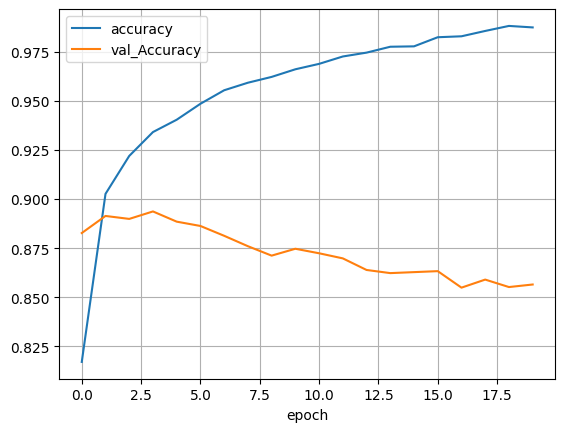

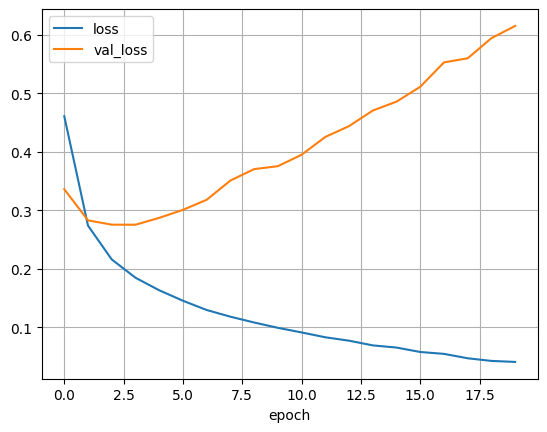

In [60]:
plt.figure()
plt.plot(history_dict['accuracy'], label='accuracy')
plt.plot(history_dict['val_accuracy'], label='val_Accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend()

plt.figure()
plt.plot(history_dict['loss'], label='loss')
plt.plot(history_dict['val_loss'], label ='val_loss')
plt.xlabel('epoch')
plt.grid()
plt.legend()

In [61]:
network.evaluate(x_test, y_test)

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.8567 - loss: 0.6519


[0.6525405049324036, 0.854200005531311]

## PART 2

In [62]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [64]:
callbacks = myCallback()
 
history = network.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), callbacks=[callbacks])

Epoch 1/20
41/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9851 - loss: 0.0427
Reached 90% accuracy so cancelling training!
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9852 - loss: 0.0425 - val_accuracy: 0.8545 - val_loss: 0.6778


In [65]:
def create_model():
    network = models.Sequential()
    network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
    network.add(layers.Dense(16, activation='relu')) 
    network.add(layers.Dense(1, activation='sigmoid'))  
 
    network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    return network
 
model = KerasClassifier(build_fn=create_model)
 
par1_batch = [32, 64]
par2_epoch = [3, 5]
 
param_grid = dict(batch_size=par1_batch,
                  epochs=par2_epoch
                  )
 
grid = GridSearchCV(estimator=model,                     
                    param_grid=param_grid,
                    cv = 3
                    )
 
grid_results = grid.fit(x_train, y_train)
 
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))

/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7943 - loss: 0.4373
Epoch 2/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9295 - loss: 0.1907
Epoch 3/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9415 - loss: 0.1545
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step


/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8075 - loss: 0.4323
Epoch 2/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9310 - loss: 0.1911
Epoch 3/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9486 - loss: 0.1525
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step


/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7973 - loss: 0.4441
Epoch 2/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9282 - loss: 0.2005
Epoch 3/3
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9427 - loss: 0.1602
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step


/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8112 - loss: 0.4481
Epoch 2/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9255 - loss: 0.1929
Epoch 3/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9443 - loss: 0.1537
Epoch 4/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9544 - loss: 0.1275
Epoch 5/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9639 - loss: 0.1024
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step


/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7999 - loss: 0.4427
Epoch 2/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9244 - loss: 0.1998
Epoch 3/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9457 - loss: 0.1492
Epoch 4/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9562 - loss: 0.1252
Epoch 5/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9673 - loss: 0.1010
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step


/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8106 - loss: 0.4254
Epoch 2/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9268 - loss: 0.1932
Epoch 3/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9442 - loss: 0.1516
Epoch 4/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9581 - loss: 0.1217
Epoch 5/5
521/521 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9693 - loss: 0.0950
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step


/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7994 - loss: 0.4611
Epoch 2/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9220 - loss: 0.2001
Epoch 3/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9463 - loss: 0.1475
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step


/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7860 - loss: 0.4722
Epoch 2/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9291 - loss: 0.1934
Epoch 3/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9500 - loss: 0.1487
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step


/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7880 - loss: 0.4719
Epoch 2/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9278 - loss: 0.2004
Epoch 3/3
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9484 - loss: 0.1467
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step


/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7927 - loss: 0.4697
Epoch 2/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9273 - loss: 0.1983
Epoch 3/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9472 - loss: 0.1468
Epoch 4/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9586 - loss: 0.1160
Epoch 5/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9690 - loss: 0.0871
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step


/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7912 - loss: 0.4747
Epoch 2/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9273 - loss: 0.1976
Epoch 3/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9488 - loss: 0.1491
Epoch 4/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9622 - loss: 0.1174
Epoch 5/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9681 - loss: 0.0977
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step


/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7990 - loss: 0.4594
Epoch 2/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9300 - loss: 0.1935
Epoch 3/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9490 - loss: 0.1482
Epoch 4/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9578 - loss: 0.1153
Epoch 5/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9692 - loss: 0.0943
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/jakubwasik/Documents/univeristy/Machine Learning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8318 - loss: 0.3992
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9230 - loss: 0.2046
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9386 - loss: 0.1673
Best: 0.885160 using {'batch_size': 32, 'epochs': 3}
